Problem Statement : **Data Driven Approach to Payment Fraud Detection**

Fraudulent transactions are a major concern; they result in significant financial losses and, more importantly, a loss of consumer trust. The purpose of this research is to thoroughly analyze a huge dataset for patterns and correlations between transaction variables and the possibility of fraud. This research will primarily focus on developing a robust predictive model capable of detecting fraudulent online transactions. It would classify the transactions as fraudulent or not based on numerous attributes in the Transaction Dataset.

In [ ]:
# importing required libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Use the below command only if you face error during unipping data.

In [ ]:
!rm -rf /content/.kaggle/
!rm -rf /.kaggle/
!rm -rf /root/.kaggle/

The below code does the work of downloading a dataset from Kaggle, which is on fraudulent transactions, extracting, and preparing them for analysis. This includes the creation of necessary authentication with the Kaggle API, downloading of the dataset, and loading into a Python environment where further analysis or processing will take place. These steps are absolutely key to the successful analysis of fraudulent transactions in developing insights or models which could be used in fraud detection and mitigation within payments.

In [ ]:
import os
os.makedirs("/content/.kaggle/")

import json

token = {"username":"adityaashokthakare","key":"637d87331a545d565a6a00a70cd1a9d6"}
with open('/content/.kaggle/kaggle.json', 'a+') as file:
    json.dump(token, file)

import shutil
os.makedirs("/.kaggle/")
src="/content/.kaggle/kaggle.json"
des="/.kaggle/kaggle.json"
shutil.copy(src,des)


os.makedirs("/root/.kaggle/")
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

!kaggle config set -n path -v /content

!kaggle datasets download -d shriyashjagtap/fraudulent-e-commerce-transactions

Unzipping the Downloaded Dataset

In [ ]:
# Unzip the dataset
zip_path = "/content/datasets/shriyashjagtap/fraudulent-e-commerce-transactions/fraudulent-e-commerce-transactions.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# List extracted files
extracted_files = os.listdir("/content/")
print(extracted_files)

# Load the dataset into a pandas dataframe (replace with the correct file name)
dataset_path = "/content/Fraudulent_E-Commerce_Transaction_Data.csv"  # Use the actual file name from the extracted files
df = pd.read_csv(dataset_path)
df3 = df
# Display the first few rows of the dataset
df.head()


**Question 1 Onkar Ramade (50604538) -**


---


**1. How does transaction behaviour-as represented by amount, frequency, and time of day-relate to the incidence of fraud in e-commerce transactions?**

**Significance :** This question focuses on transaction behaviours, crucial in ascertaining fraud dynamics. Knowing how specific characteristics of a transaction relate to fraud might help guide the design in fraud detection systems that flag suspicious activities.

**Possible Hypothesis:** The higher the amount of money transacted, the greater the likelihood of fraud.


---

**Question 2 Onkar Ramade (50604538) -**

**2. What are demographic factors, including but not limited to age, location, and method of payment, that signal fraudulent e-commerce transactions?**

**Importance:**  By searching out the demographic influences, teams can find patterns in subsets of customers that could elude fraud detection efforts in a more effective and specific manner.

**Potential Hypotheses:** Younger customers are most likely to be perpetrators of fraudulent transactions when compared to older customers.

--------------------------------------------------------------------------

--------------------------------------------------------------------------

**Question 1 Sourabh Kodag (50606796)** -


---
1. Is there fraud transaction in uneven hours ?

**Rationale Behind the Hypothesis:**

Behavioural Patterns: Customers' behaviour also depends on the time of day. Overnight transactions, for example, have less oversight and more anonymity and therefore hold greater potential for fraudulent activities.

Operational Factors: Most businesses will be having a skeleton crew during very late or very early hours. These periods will therefore mean that transactions are not monitored as carefully and there is less support to react quickly to suspicious activities.

**Importance:**

Identifying Behavioural Patterns: Analyzing the time of fraud transactions will relate to the behavioural patterns of fraudsters. Understanding when fraud is most likely to occur means there are familiar tactics against which organizations can adapt their defenses.

Operational Improvement: Peak hours of fraud help the organization in optimizing its resources. For instance, if data reflected that most frauds happened after midnight, a company would increase monitoring and fraud detection at such hours to avoid any possible loss.

---
**Question 2 Sourabh Kodag (50606796)** -
2. Is there a relation between account age and fraud ?

**Hypothesis Rationale**

Lack of Transaction History: New accounts lack transaction history, and no pattern can be established to indicate a trend in legitimate behavior. Fraudsters are normally taking advantage of the lack of history since there are no prior behaviors to which one could compare when assessing legitimacy.

Vulnerability to Exploitation: In general, fraudsters may target new accounts since they are less monitored. And most probably, they would have been opened without strict identity verification processes in place. This makes newer accounts the favorite target for fraudsters.
likecopy

**Importance:**

Changes in Business Practice: The findings have many implications for wider business practices, including marketing strategies and customer engagement. For instance, organizations can make promotional offers that incentivize customers to engage when they are on the site, but security measures will be in place.

Supporting Regulatory Compliance:Many industries have certain regulations that call for them to put in place methods for fraud prevention. It would also be of significance to an organization in case there are risks related to new accounts to also note them to ensure compliance with the set regulations to avoid probable penalties.

--------------------------------------------------------------------------

--------------------------------------------------------------------------

**Question 1 Aditya Thakare (50608812)** -


---

**Question 1:** "Is there a correlation between the customer age and the likelihood of fraud?"

**Why This Question is significant and leading to our object:** Fraud Detection: Understanding the relationship between customer age and fraud can inform better risk assessment models. If fraudulent activities are detected among a population with younger age groups more frequently, then a business could institute additional verification steps for these transactions. Feature Engineering: This customer age can be a critical feature in fraud detection algorithms, especially by enabling the algorithm to create risk profiles. Market Strategies: Knowledge of the age-related pattern of fraud can help organizations in framing appropriate marketing strategies and fraud prevention policy.



---
**Question 2 Aditya Thakare (50608812)** -

**Question 2: **"Is there a correlation between the payment method used and the likelihood of fraud?"

**How It Leads to Our Objective:**
Feature Engineering: Knowing the correlations between fraud and means of payment helps decide which features are most appropriate for fraud detection algorithms. For instance, if credit cards bear the brunt of fraud, then that feature would be amplified in the model.
Fraud Prevention: The ability to identify the most risky forms of payments will allow businesses to focus fraud prevention measures on those forms of payments and reduce the overall incidence of fraud.
Significance of the Question:
Security Measures: The associations between the mode of payments and fraud assist firms in implementing extra security measures around the risky payment types.
**Cost Efficiency:** In spotting fraud-related modes of payments, the companies can effectively allocate their resources to further the fraud detection and prevention programs.
**Customer Trust:** This enhances customer trust as, with greater clarity on fraudulent ways of making payments, businesses can advise on the use of safer alternatives like PayPal or bank transfers.


 **Data Cleaning**



```
# This is formatted as code
```

Handle missing values: In this step, we check for missing values and remove them if found.

In [ ]:
df.isnull().sum()
df=df.dropna()       #removes rows with null values
df1 = df

In [ ]:
df.info()            #metadata

Correct Data Types: In this step for the date column, we convert it to datetime format if not already.

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

Removing undesired duplicate entries: Transactions should be unique as duplicate transactions could skew fraud detection Checking for duplicates based on Transaction ID to ensure data integrity.

In [ ]:
df.duplicated(subset=['Transaction ID']).sum() #checking duplicate Transaction IDs

Sometimes, addresses have slight variations (like different abbreviations). A string standardization function can help clean up Shipping Address and Billing Address.

In [ ]:
#converting to lower-case
df['Shipping Address'] = df['Shipping Address'].str.lower().str.strip()
df['Billing Address'] = df['Billing Address'].str.lower().str.strip()

Adding necessary features: The transaction date can be broken doen into day of the week which may be useful for detecting fraud patterns.

In [ ]:
df['Transaction Day'] = df['Transaction Date'].dt.weekday
df.head()
dfo1 = df

We identify observed irregularities in the customer age column:

In [ ]:
import plotly.express as px

fig = px.box(data_frame=df,
             x="Customer Age",
             title="Customer Age Distribution",
             width=600, height=400,
             template="plotly_dark")

fig.update_layout(
    xaxis_title="Customer Age",
    yaxis_title="Frequency",
    showlegend=False
)
fig.show()

We observe there are some negative values. Assuming them as mistakes we replace
them with their absolute values as below:

In [ ]:
df['Customer Age'] = np.where(df['Customer Age'] < 0, np.abs(df['Customer Age']), df['Customer Age'])

We check if the shipping address and billing address are same, to detect
possible fraudulent behaviour:

In [ ]:
df["Is Address Match"] = (df["Shipping Address"] == df["Billing Address"]).astype(int) #marking 1 for same address and 0 for different

Reducing dataset size by downcasting: We reduce the dataset size by downcasting all integer and float values. Downcasting helps in reducing the dataset size without actually changing the original values. bold text

In [ ]:
integer_cols = df.select_dtypes(include="int").columns   #selecting integer columns
float_cols = df.select_dtypes(include="float").columns   #selecting float columns

#downcasting
df[integer_cols] = df[integer_cols].apply(pd.to_numeric, downcast='integer')
df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472952 entries, 0 to 1472951
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Transaction ID      1472952 non-null  object        
 1   Customer ID         1472952 non-null  object        
 2   Transaction Amount  1472952 non-null  float32       
 3   Transaction Date    1472952 non-null  datetime64[ns]
 4   Payment Method      1472952 non-null  object        
 5   Product Category    1472952 non-null  object        
 6   Quantity            1472952 non-null  int8          
 7   Customer Age        1472952 non-null  int8          
 8   Customer Location   1472952 non-null  object        
 9   Device Used         1472952 non-null  object        
 10  IP Address          1472952 non-null  object        
 11  Shipping Address    1472952 non-null  object        
 12  Billing Address     1472952 non-null  object        
 13  Is Fraudulen

Thus, we observe our dataset size has significantly reduced by about 130MBs.

**Hypothesis 1** (Onkar : 50604538): Does value of tranasaction increase the likelihood of fraudulent transactions ?

In [ ]:
df['Transaction Amount'].describe()  # Checking for extreme values

count    1.472952e+06
mean     2.267682e+02
std      2.702478e+02
min      1.000000e+01
25%      6.861000e+01
50%      1.517600e+02
75%      2.960500e+02
max      1.270175e+04
Name: Transaction Amount, dtype: float64

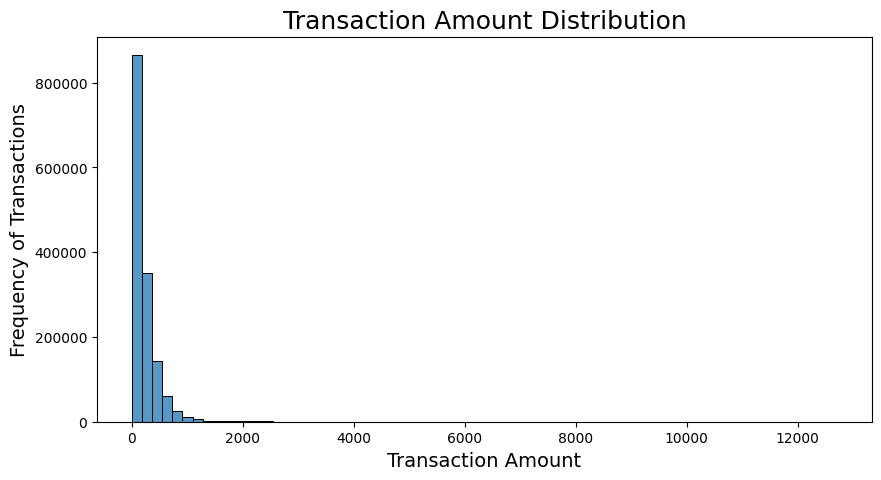

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(df['Transaction Amount'], bins=70)

plt.title('Transaction Amount Distribution', fontsize=18)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency of Transactions', fontsize=14)

plt.show()

The transaction amount bins between 0 to 1000 has the highest frequency

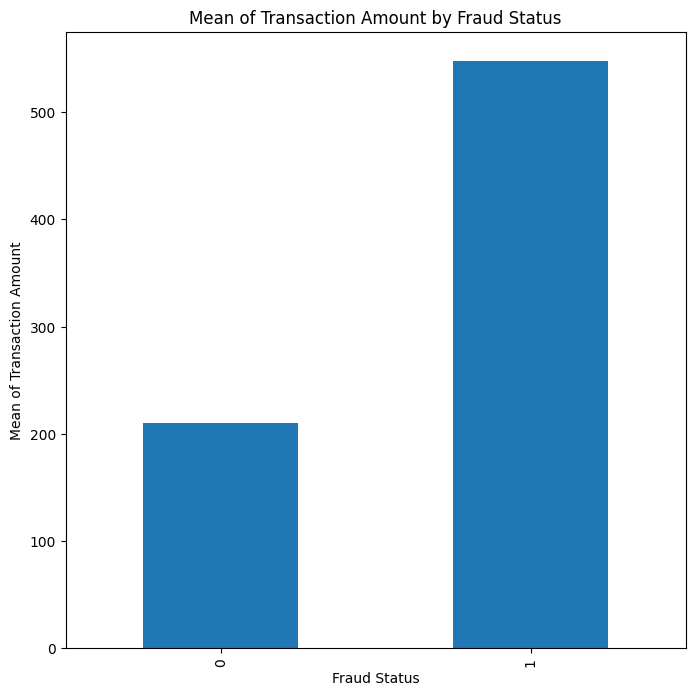

In [ ]:
fraud_groups = df.groupby('Is Fraudulent')
feature_mean = fraud_groups['Transaction Amount'].mean()
plt.figure(figsize=(8, 8))
feature_mean.plot(kind='bar')
plt.xlabel('Fraud Status')
plt.ylabel('Mean of Transaction Amount')
plt.title('Mean of Transaction Amount by Fraud Status')
plt.show()

Mean Transaction Amount of Fraudulent Transaction is higher compared to legitimate transactions, which supports our hypothesis.

                    Transaction Amount  Is Fraudulent
Transaction Amount            1.000000       0.272766
Is Fraudulent                 0.272766       1.000000


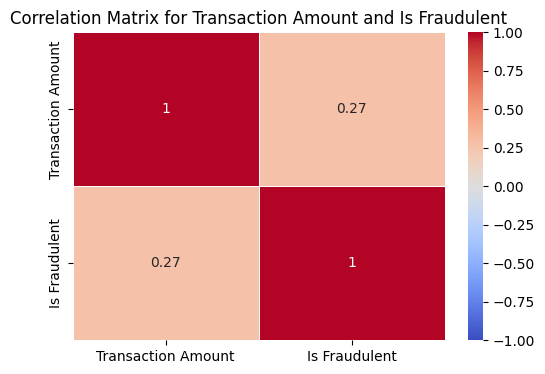

In [ ]:
fraud_corr = df[['Transaction Amount', 'Is Fraudulent']].corr()
print(fraud_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(fraud_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Transaction Amount and Is Fraudulent')
plt.show()

The correlation output between Transaction Amount and Is Fraudulent shows a positive but weak correlation coefficient of 0.272766. The relationship suggests that higher transaction amounts are more likely to be fraudulent but the strength of the correlation is not very high.

It would still be helpful to plot by relationship between Transaction Amount and Fraud likelihood. We aanalyze this further by binning the transaction amount in multiple bins of transaction amount.

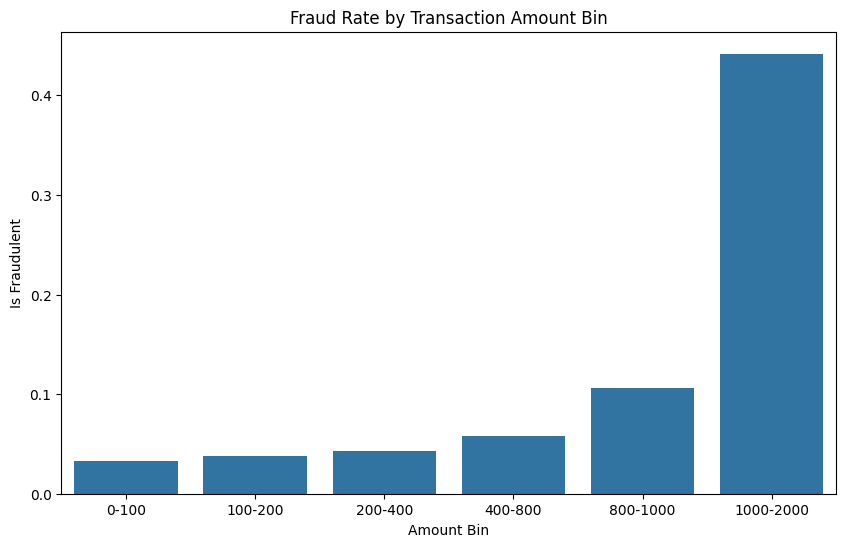

In [ ]:
df['Amount Bin'] = pd.cut(df['Transaction Amount'], bins=[0, 100, 200, 400, 600, 1000, 2000], labels=['0-100', '100-200', '200-400', '400-800', '800-1000', '1000-2000'])
fraud_rate_by_amount_bin = df.groupby('Amount Bin')['Is Fraudulent'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Amount Bin', y='Is Fraudulent', data=fraud_rate_by_amount_bin)
plt.title('Fraud Rate by Transaction Amount Bin')
plt.show()

From the graph we interpret that high value transaction bins have very high chances of fraud, compared to low and medium range bins. This supports our hypothesis that high-value transactions are more susceptible to fraud, likely because they offer higher potential rewards for the fraudster.

Handling the outliers in the Transaction Amount feature

In [ ]:
Q1 = df['Transaction Amount'].quantile(0.25)
Q3 = df['Transaction Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Transaction Amount'] < lower_bound) | (df['Transaction Amount'] > upper_bound)]
print("Number of outliers detected:", outliers.shape[0])


Number of outliers detected: 79180


Capping the outliers to upper and lower bound to limit their impact.

In [ ]:
df['Transaction Amount'] = np.where(df['Transaction Amount'] > upper_bound, upper_bound, df['Transaction Amount'])
df['Transaction Amount'] = np.where(df['Transaction Amount'] < lower_bound, lower_bound, df['Transaction Amount'])

**Hypothesis 2 :** Do younger customers have a higher chance of commiting fraud ?

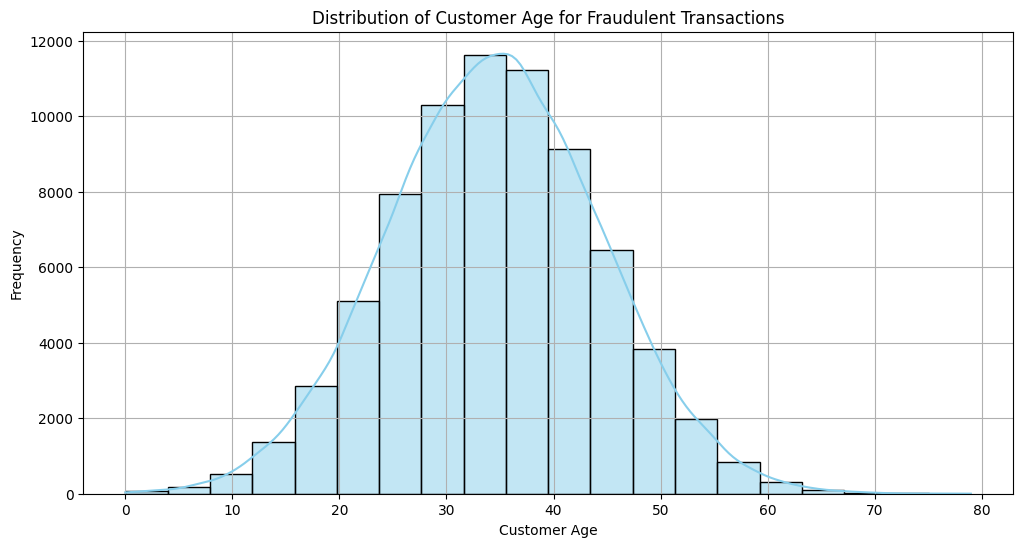

In [ ]:
fraudulent_transactions = df[df['Is Fraudulent'] == 1]

plt.figure(figsize=(12, 6))
sns.histplot(fraudulent_transactions['Customer Age'], bins=20, kde=True, color='skyblue')

plt.title('Distribution of Customer Age for Fraudulent Transactions')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Fraudulent transaction are normally distributed across customers of all ages.

**Hypothesis 3** : Sourabh Kodag (50606796) - The hypothesis "Fraudulent transactions vary by hour" assumes that time could be a factor for fraud. This hypothesis postulates that segments based on the time of day may be vulnerable to fraudulent activities. This analysis will help an organization understand patterns that could indicate the likelihood of fraud at specific times.



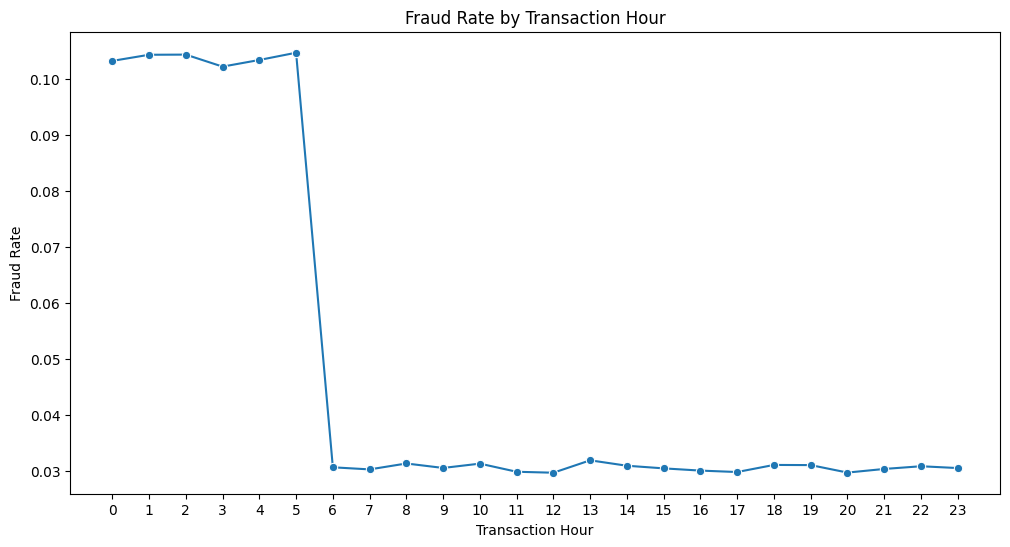

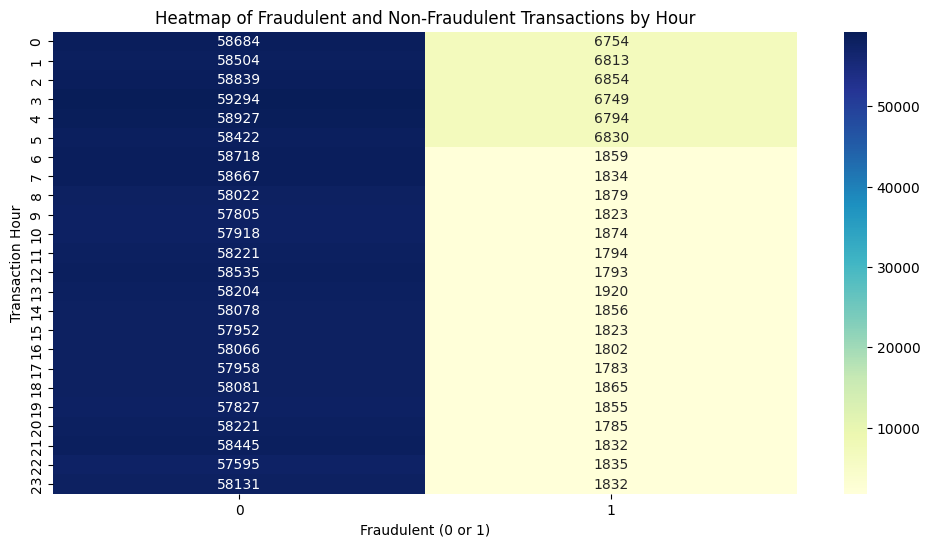

In [ ]:
# Group by Transaction Hour and calculate the fraud rate
fraud_hour = df.groupby('Transaction Hour')['Is Fraudulent'].mean().reset_index()

# Plot 1: Line plot of Fraud Rate by Transaction Hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Transaction Hour', y='Is Fraudulent', data=fraud_hour, marker='o')
plt.title('Fraud Rate by Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Fraud Rate')
plt.xticks(range(0, 24))
plt.show()



# Create a pivot table to count fraudulent and non-fraudulent transactions by hour
hour_fraud_matrix = df.pivot_table(index='Transaction Hour',
                                   columns='Is Fraudulent',
                                   aggfunc='size',
                                   fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hour_fraud_matrix, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Heatmap of Fraudulent and Non-Fraudulent Transactions by Hour')
plt.xlabel('Fraudulent (0 or 1)')
plt.ylabel('Transaction Hour')
plt.show()

**Hypothesis 4 :** Sourabh Kodag (50606796) - This hypothesis therefore assumes that the newer the account, the more likely it is to be fraudulent compared to older, well-established accounts. A detailed explanation of this hypothesis and its importance is provided below.



Fraudulent Transactions Account Age Stats:
count    73838.000000
mean       116.295024
std        116.100774
min          1.000000
25%         17.000000
50%         61.000000
75%        214.000000
max        365.000000
Name: Account Age Days, dtype: float64

Non-Fraudulent Transactions Account Age Stats:
count    1.399114e+06
mean     1.829898e+02
std      1.053010e+02
min      1.000000e+00
25%      9.200000e+01
50%      1.830000e+02
75%      2.740000e+02
max      3.650000e+02
Name: Account Age Days, dtype: float64


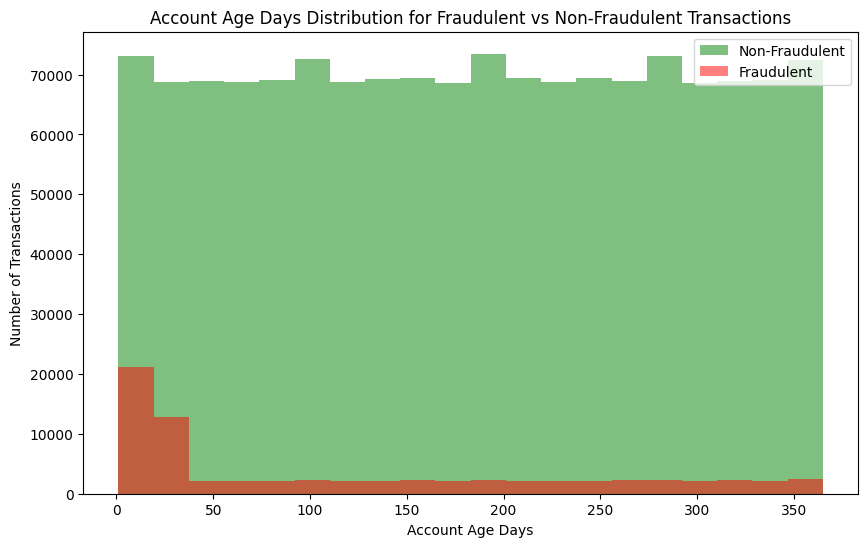

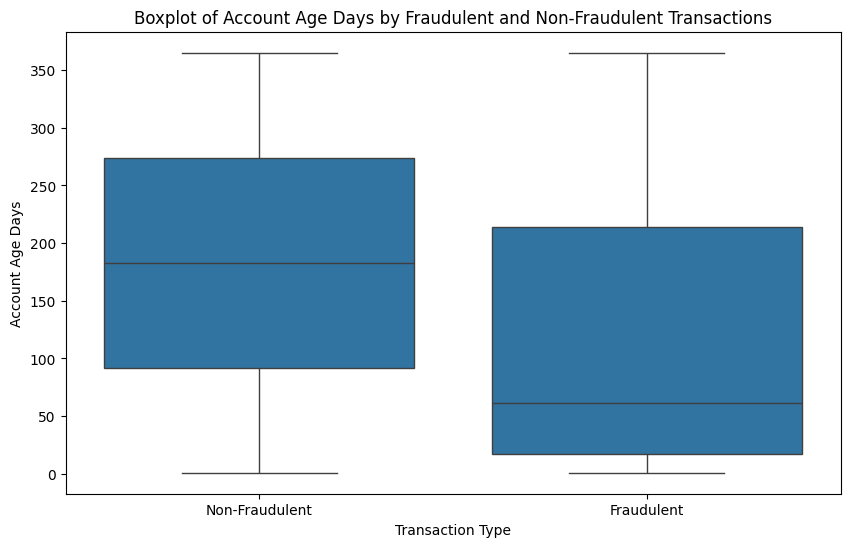

In [ ]:
df['Is Fraudulent'] = df['Is Fraudulent'].astype(bool)

fraudulent_transactions = df[df['Is Fraudulent'] == True]
non_fraudulent_transactions = df[df['Is Fraudulent'] == False]

print("Fraudulent Transactions Account Age Stats:")
print(fraudulent_transactions['Account Age Days'].describe())

print("\nNon-Fraudulent Transactions Account Age Stats:")
print(non_fraudulent_transactions['Account Age Days'].describe())
plt.figure(figsize=(10,6))


plt.hist(non_fraudulent_transactions['Account Age Days'], bins=20, alpha=0.5, label='Non-Fraudulent', color='green')
plt.hist(fraudulent_transactions['Account Age Days'], bins=20, alpha=0.5, label='Fraudulent', color='red')

plt.title('Account Age Days Distribution for Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Account Age Days')
plt.ylabel('Number of Transactions')
plt.legend()

plt.show()


plt.figure(figsize=(10,6))
df['Fraudulent Label'] = df['Is Fraudulent'].apply(lambda x: 'Fraudulent' if x else 'Non-Fraudulent')

sns.boxplot(x='Fraudulent Label', y='Account Age Days', data=df)
plt.title('Boxplot of Account Age Days by Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Account Age Days')
plt.show()

**Hypothesis 5 :** Aditya Thakare (50608812) - "Is there a correlation between the payment method used and the likelihood of fraud?"

Why This Question is significant and leading to our object: Fraud Detection: Understanding the relationship between customer age and fraud can inform better risk assessment models. If fraudulent activities are detected among a population with younger age groups more frequently, then a business could institute additional verification steps for these transactions. Feature Engineering: This customer age can be a critical feature in fraud detection algorithms, especially by enabling the algorithm to create risk profiles. Market Strategies: Knowledge of the age-related pattern of fraud can help organizations in framing appropriate marketing strategies and fraud prevention policy.

**Task 5. for Question1 (Aditya-50608812)**
**Hypothesis 5:**
Older customers (above 60) are more likely to engage in fraudulent transactions.

**EDA Operation** 1: Fraud Rate by Age Group
Objective: to find the fraud rate across different age groups and get the variation of fraud likelihood with customer age.

**Steps:**
Divide into groups according to the age groups.
Next, divide the data into age groups and calculate the rate of fraud in each group.

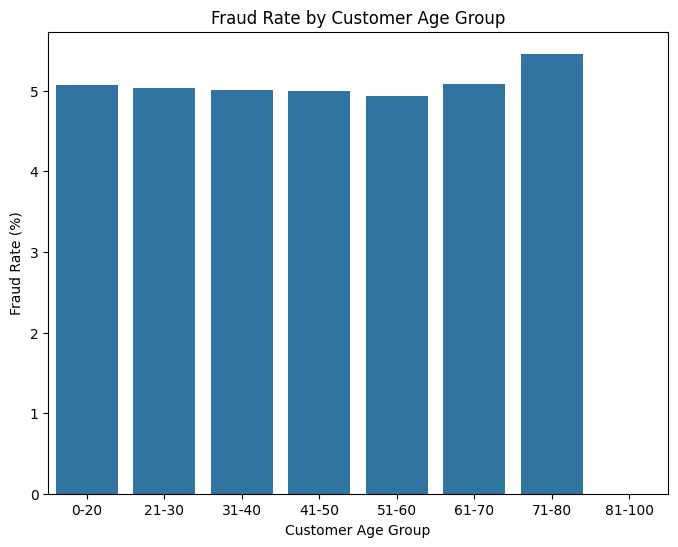

In [ ]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df['Age_Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

age_group_fraud_rate = df.groupby('Age_Group')['Is Fraudulent'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_fraud_rate.index, y=age_group_fraud_rate.values)
plt.title('Fraud Rate by Customer Age Group')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Customer Age Group')
plt.show()

The bar chart displays the fraud rates across different age groups. A higher fraud rate in the older age group (>60) supports the hypothesis that older customers are more likely to engage in fraud.

**Task 5. Question 1(Aditya-50608812) Hypothesis 6:** Working younger customers (e.g., between 25-45 years old) are more likely to engage in fraudulent transactions.

**EDA operation 2:** Transaction Amount Distribution per Age Group: transaction amount for different age categories for fraudulent transactions.

**Steps:** Filter the dataset for fraudulent transactions. Create a Boxplot to Compare Transaction Amount across the defined age groupings:

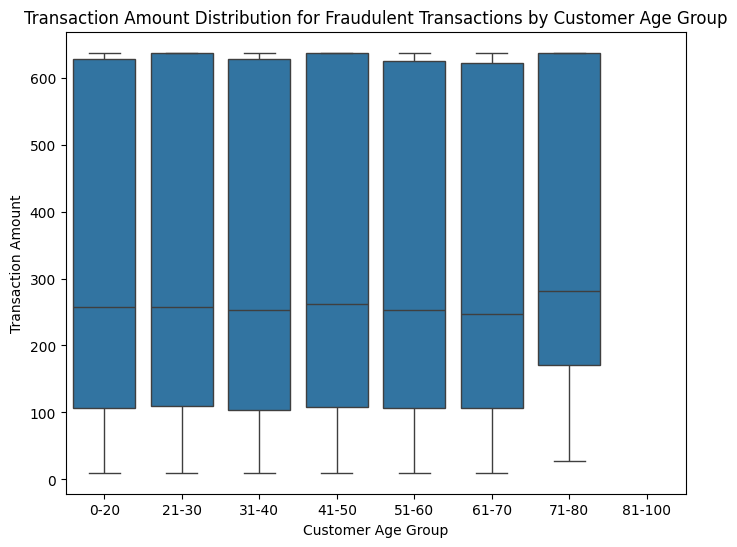

In [ ]:
fraudulent_data_1 = df[df['Is Fraudulent'] == 1]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='Transaction Amount', data=fraudulent_data_1)
plt.title('Transaction Amount Distribution for Fraudulent Transactions by Customer Age Group')
plt.ylabel('Transaction Amount')
plt.xlabel('Customer Age Group')
plt.show()

The box plot will shows how the transaction amounts for fraudulent activities vary across different payment methods. This reveals that higher-value transactions tend to be fraudulent when using certain payment methods-credit/debit cards.

**Task 5. for Question 2.(Aditya-50608812)**

**Hypothesis:**
Fraudulent transactions are more likely to occur in higher amount transactions with payment methods that do not require strong authentication (e.g., debit card or credit card vs paypal).

**EDA operation:** Fraud Distribution by Transaction Amount for Each Payment Method-

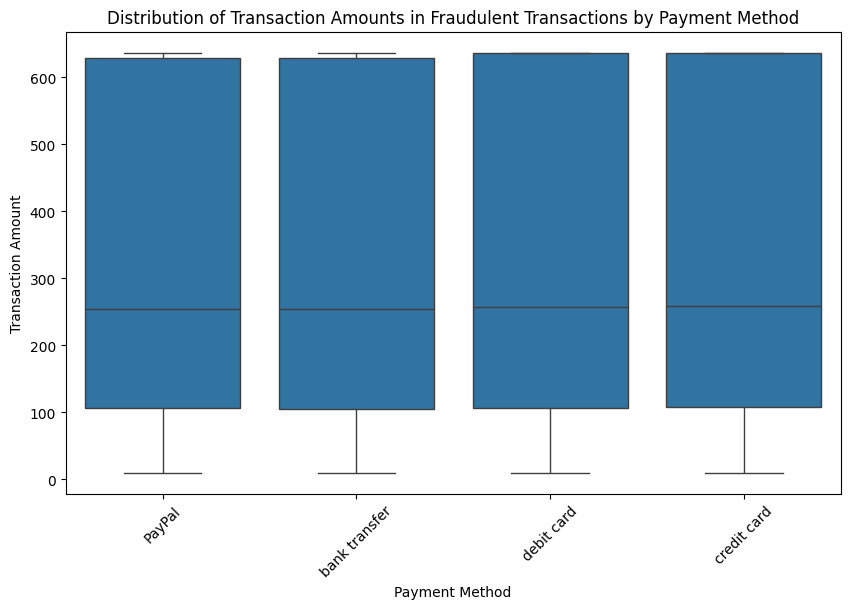

In [ ]:
import seaborn as sns

# Filter fraudulent transactions
fraud_data = df[df['Is Fraudulent'] == 1]

# Visualize distribution of transaction amounts for each payment method
plt.figure(figsize=(10,6))
sns.boxplot(x='Payment Method', y='Transaction Amount', data=fraud_data)
plt.title('Distribution of Transaction Amounts in Fraudulent Transactions by Payment Method')
plt.ylabel('Transaction Amount')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

The box plot will shows how the transaction amounts for fraudulent activities vary across different payment methods. This reveals that higher-value transactions tend to be fraudulent when using certain payment methods-credit/debit cards.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Preprocess the data
# Handle missing values, encoding, etc.

# Feature scaling for 'Transaction Amount'
scaler = StandardScaler()
dfo1['Transaction Amount'] = scaler.fit_transform(dfo1[['Transaction Amount']])

# Features and target
X = dfo1[['Transaction Amount', 'Account Age Days', 'Customer Age', 'Is Address Match', 'Transaction Hour']] # Add other relevant features
y = dfo1['Is Fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9498898472797879
Confusion Matrix:
[[279829      0]
 [ 14762      0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    279829
        True       0.00      0.00      0.00     14762

    accuracy                           0.95    294591
   macro avg       0.47      0.50      0.49    294591
weighted avg       0.90      0.95      0.93    294591



In [ ]:
# Using Resampling (Oversampling/Undersampling)
from sklearn.utils import resample

# Separate the minority and majority classes
df_majority = dfo1[dfo1['Is Fraudulent'] == 0]
df_minority = dfo1[dfo1['Is Fraudulent'] == 1]

# Oversample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class size
                                 random_state=42)  # For reproducibility

# Combine the majority and upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Split into features and target
X = df_balanced[['Transaction Amount', 'Account Age Days', 'Customer Age', 'Is Address Match', 'Transaction Hour']]  # Add relevant features
y = df_balanced['Is Fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.6886406764275989
Confusion Matrix:
[[195332  84029]
 [ 90222 190063]]
Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.70      0.69    279361
        True       0.69      0.68      0.69    280285

    accuracy                           0.69    559646
   macro avg       0.69      0.69      0.69    559646
weighted avg       0.69      0.69      0.69    559646



The dataset is highly imbalanced (high non-fraudulent transactions than fraudulent ones). We handled this by balancing the dataset by oversampling the minority class. This method helps balance the dataset directly but may lead to overfitting when oversampling.

The model's precision and recall for fraudulent transactions are relatively well-balanced (around 0.68–0.69), which means that it's not overfitting too much to the fraudulent transactions. However, high-risk detection cases (like fraudulent detection), recall is a more important evaluation metric, especially when we want to minimize false negatives.

**Reason :** Missing a fraudulent transaction (false negative) is much worse than flagging a legitimate transaction as fraudulent (false positive). The financial impact of missing fraud is much higher than the cost of false positives, which can usually be addressed by a manual review process.


Recall can be improved further using Extreme Gradient Boost (XGBoost).

In [ ]:
# XG Boost
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature scaling for 'Transaction Amount'
scaler = StandardScaler()
dfo1['Transaction Amount'] = scaler.fit_transform(dfo1[['Transaction Amount']])

# Features and target
X = dfo1[['Transaction Amount', 'Account Age Days', 'Customer Age', 'Is Address Match', 'Transaction Hour']]  # Add relevant features
y = dfo1['Is Fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model with scale_pos_weight to handle imbalance
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                              random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.7704478412443014
Confusion Matrix:
[[216597  63232]
 [  4392  10370]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.77      0.86    279829
        True       0.14      0.70      0.23     14762

    accuracy                           0.77    294591
   macro avg       0.56      0.74      0.55    294591
weighted avg       0.94      0.77      0.83    294591



XGBoost acheived higher accuracy than Logistic regression with resampling, as it is better able to capture the complex non-linear relationships in imbalanced dataset. It has a higher recall (0.70) for fraudulent transactions, meaning it correctly identifies 70% of fraud cases.

In [ ]:
# Using Logistic regression weights to handle imbalances
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming you have loaded and preprocessed the dataset
# df = pd.read_csv('your_dataset.csv')

# Feature scaling for 'Transaction Amount'
scaler = StandardScaler()
dfo1['Transaction Amount'] = scaler.fit_transform(dfo1[['Transaction Amount']])

# Features and target
X = dfo1[['Transaction Amount', 'Account Age Days', 'Customer Age', 'Is Address Match', 'Transaction Hour']]  # Add relevant features
y = dfo1['Is Fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with class weighting
model = LogisticRegression(class_weight='balanced')  # Adjusts for class imbalance
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


In [ ]:
# Using SMOTE to handle imbalances
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Feature scaling for 'Transaction Amount'
scaler = StandardScaler()
dfo1['Transaction Amount'] = scaler.fit_transform(dfo1[['Transaction Amount']])

# Features and target
X = dfo1[['Transaction Amount', 'Account Age Days', 'Customer Age', 'Is Address Match', 'Transaction Hour']]  # Add relevant features
y = dfo1['Is Fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


In [ ]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature scaling for 'Transaction Amount'
scaler = StandardScaler()
dfo1['Transaction Amount'] = scaler.fit_transform(dfo1[['Transaction Amount']])

# Features and target
X = dfo1[['Transaction Amount', 'Account Age Days', 'Customer Age', 'Is Address Match', 'Transaction Hour']]  # Add relevant features
y = dfo1['Is Fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest with class weighting
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9486847867042781
Confusion Matrix:
[[277649   2180]
 [ 12937   1825]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97    279829
        True       0.46      0.12      0.19     14762

    accuracy                           0.95    294591
   macro avg       0.71      0.56      0.58    294591
weighted avg       0.93      0.95      0.93    294591



In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined

# Step 1: Apply SMOTE to the training data
sm = SMOTE(random_state=42)  # Random state for reproducibility
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Step 2: Define the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=300,        # Number of boosting rounds
    max_depth=5,             # Maximum depth of each tree
    learning_rate=0.1,       # Learning rate
    scale_pos_weight=2,      # Class weight ratio (can tune this)
    random_state=42
)

# Step 3: Train the XGBoost model on the resampled (balanced) dataset
xgb_model.fit(X_resampled, y_resampled)

# Step 4: Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[174215 105614]
 [  2709  12053]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.62      0.76    279829
        True       0.10      0.82      0.18     14762

    accuracy                           0.63    294591
   macro avg       0.54      0.72      0.47    294591
weighted avg       0.94      0.63      0.73    294591



In [ ]:
!pip install nbconvert
!apt-get install texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/50608812_50604538_50606796_phase_2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/50608812_50604538_50606796_phase_2.ipynb to pdf
[WARNING] Could not parse YAML metadata at line 20 column 1: Lexical error near "1. Is there fraud transaction in uneven hours ?"
[NbConvertApp] Support files will be in 50608812_50604538_50606796_phase_2_files/
[NbConvertApp] Making directory ./50608812_50604538_50606796_phase_2_files
[NbConvertApp] Writing 134757 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 471741 bytes to /content/drive/MyDrive/Colab Notebooks/50608812_50604538_50606796_phase_2.pdf


In [ ]:
X = dfo1.drop('Is Fraudulent', axis=1)
y = dfo1['Is Fraudulent']
X.shape, y.shape

((1472952, 20), (1472952,))

In [ ]:
X_clean = X.dropna()
y_clean = y[X_clean.index]  # Make sure to apply the same row indices for X and y

In [ ]:
# SMOTE
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.87      0.86      0.86    223668
        True       0.86      0.87      0.86    224046

    accuracy                           0.86    447714
   macro avg       0.86      0.86      0.86    447714
weighted avg       0.86      0.86      0.86    447714



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
model = LogisticRegression(penalty='l2', solver='liblinear')  # L2 regularization (Ridge)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Use L2 regularization (Ridge)
    'solver': ['liblinear'],  # Suitable for smaller datasets
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
model = grid_search.best_estimator_


In [ ]:
# Scaling the data for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Handling class imbalance with SMOTE (Synthetic Minority Over-sampling)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print(f"Class distribution before SMOTE: {y_train.value_counts()}")
print(f"Class distribution after SMOTE: {y_train_resampled.value_counts()}")

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],        # Use L2 regularization (Ridge)
    'solver': ['liblinear'],  # Solver suitable for small datasets
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters from GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the test set
y_pred = best_model.predict(X_test)

# Evaluation: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Coefficients
print("Model Coefficients:")
print(f'Coefficient for Transaction Amount: {best_model.coef_[0][0]}')
print(f'Intercept: {best_model.intercept_[0]}')

# Additional Evaluation: ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (fraudulent)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Hypothesis 2

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming df is your dataset and contains both categorical and numerical columns

# Separate the numerical and categorical columns
numerical_columns = ['Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour', 'Transaction Day']
categorical_columns = ['Device Used', 'Payment Method', 'Product Category', 'Is Address Match']  # Add more categorical columns as needed

# Features (X) and target (y)
X = df[numerical_columns + categorical_columns]
y = df['Is Fraudulent']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a preprocessor using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standard scaling for numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # OneHotEncoding for categorical columns
    ])

# Create a pipeline that first applies preprocessing, then the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(kernel='linear', random_state=42))  # You can replace SVC with any other model
])

# Fit the model using the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print the evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split features and target
X = dfo1[numerical_columns + categorical_columns]
y = dfo1['Is Fraudulent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature scaling (optional for LightGBM but helps in some cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# LightGBM Model
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_scaled, y_train_res)

# Predictions
y_pred = lgbm_model.predict(X_test_scaled)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
